In [1]:
import re
import pandas as pd
from datetime import datetime

In [2]:
f = open('WhatsApp Chat with CE (student only).txt','r',encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

10/6/20, 12:35 - Shaurya Saxena Nmims: ok thanks, told sir it is a common issue for all
10/6/20, 14:06 - Hirak Nmims: <div style="margin-top: 24px; margin-bottom: 10px;"><a class="me-email-headline" style="font-size: 18px;font-family:'Segoe UI Semibold','Segoe UI','Helvetica Neue',Helvetica,Arial,sans-serif;text-decoration: underline;color: #6264a7;" href="https://teams.microsoft.com/l/meetup-join/19%3a57fe14edae6746e887df0a20e9eb44d1%40thread.tacv2/1599464726775?context=%7b%22Tid%22%3a%22d1f14348-f1b5-4a09-ac99-7ebf213cbc81%22%2c%22Oid%22%3a%22d8805717-f692-4399-81ae-18a315cbd22d%22%7d" target="_blank" rel="noreferrer noopener">Join
 Microsoft Teams Meeting</a> </div>
<a class="me-email-link" style="font-size: 12px;text-decoration: none;color: #6264a7;" target="_blank" href="https://aka.ms/JoinTeamsMeeting" rel="noreferrer noopener">Learn more about Teams</a> |
<a class="me-email-link" style="font-size: 12px;text-decoration: none;color: #6264a7;" target="_blank" href="https://teams.mi

In [5]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [6]:
messages = re.split(pattern,data)[1:]
messages

['Shaurya Saxena Nmims: ok thanks, told sir it is a common issue for all\n',
 'Hirak Nmims: <div style="margin-top: 24px; margin-bottom: 10px;"><a class="me-email-headline" style="font-size: 18px;font-family:\'Segoe UI Semibold\',\'Segoe UI\',\'Helvetica Neue\',Helvetica,Arial,sans-serif;text-decoration: underline;color: #6264a7;" href="https://teams.microsoft.com/l/meetup-join/19%3a57fe14edae6746e887df0a20e9eb44d1%40thread.tacv2/1599464726775?context=%7b%22Tid%22%3a%22d1f14348-f1b5-4a09-ac99-7ebf213cbc81%22%2c%22Oid%22%3a%22d8805717-f692-4399-81ae-18a315cbd22d%22%7d" target="_blank" rel="noreferrer noopener">Join\n Microsoft Teams Meeting</a> </div>\n<a class="me-email-link" style="font-size: 12px;text-decoration: none;color: #6264a7;" target="_blank" href="https://aka.ms/JoinTeamsMeeting" rel="noreferrer noopener">Learn more about Teams</a> |\n<a class="me-email-link" style="font-size: 12px;text-decoration: none;color: #6264a7;" target="_blank" href="https://teams.microsoft.com/meeti

In [7]:
dates = re.findall(pattern,data)
dates

['10/6/20, 12:35 - ',
 '10/6/20, 14:06 - ',
 '10/6/20, 14:06 - ',
 '10/6/20, 14:06 - ',
 '10/6/20, 14:07 - ',
 '10/6/20, 14:08 - ',
 '10/6/20, 14:08 - ',
 '10/6/20, 14:08 - ',
 '10/6/20, 14:08 - ',
 '10/6/20, 14:09 - ',
 '10/6/20, 14:11 - ',
 '10/6/20, 14:11 - ',
 '10/6/20, 14:11 - ',
 '10/6/20, 14:12 - ',
 '10/6/20, 14:12 - ',
 '10/6/20, 14:13 - ',
 '10/6/20, 14:35 - ',
 '10/6/20, 14:35 - ',
 '10/6/20, 14:36 - ',
 '10/6/20, 14:56 - ',
 '10/6/20, 14:56 - ',
 '10/6/20, 14:56 - ',
 '10/6/20, 14:57 - ',
 '10/6/20, 15:05 - ',
 '10/6/20, 15:05 - ',
 '10/6/20, 15:06 - ',
 '10/6/20, 15:07 - ',
 '10/6/20, 15:09 - ',
 '10/6/20, 15:09 - ',
 '10/6/20, 15:13 - ',
 '10/6/20, 15:13 - ',
 '10/6/20, 15:23 - ',
 '10/6/20, 15:25 - ',
 '10/6/20, 15:25 - ',
 '10/6/20, 15:34 - ',
 '10/6/20, 16:06 - ',
 '10/6/20, 16:08 - ',
 '10/6/20, 16:08 - ',
 '10/6/20, 16:08 - ',
 '10/6/20, 16:08 - ',
 '10/6/20, 16:09 - ',
 '10/6/20, 16:35 - ',
 '10/6/20, 16:35 - ',
 '10/6/20, 16:36 - ',
 '10/6/20, 17:01 - ',
 '10/6/20,

In [8]:
df = pd.DataFrame({'user_message':messages,'message_date':dates})
#convert message_date type

df['message_date'] =pd.to_datetime(df['message_date'],  format='%m/%d/%y, %H:%M - ')
#print(ndf)
df.rename(columns={'message_date':'date'},inplace=True)
df.head()

user_message                date
0  Shaurya Saxena Nmims: ok thanks, told sir it i... 2020-10-06 12:35:00
1  Hirak Nmims: <div style="margin-top: 24px; mar... 2020-10-06 14:06:00
2                                  Hirak Nmims: A1\n 2020-10-06 14:06:00
3                             Hirak Nmims: PHY TUT\n 2020-10-06 14:06:00
4                        +91 91113 34454: A2 link?\n 2020-10-06 14:07:00

In [9]:
df.shape

(39998, 2)

In [10]:
#seprate users and messages
users=[]
message = []


for messages in df['user_message']:
    #print(messages)
    entry = re.split(':', messages)
   # print(entry[0])
    if entry[1:]:#username
        users.append(entry[0])
        message.append(entry[1])
    else:
        users.append('group_notification')
        message.append(entry[0])
        
df['user'] = users
df['message']=message
df.drop(columns=['user_message'],inplace=True)

df.head()

date                  user   
0 2020-10-06 12:35:00  Shaurya Saxena Nmims  \
1 2020-10-06 14:06:00           Hirak Nmims   
2 2020-10-06 14:06:00           Hirak Nmims   
3 2020-10-06 14:06:00           Hirak Nmims   
4 2020-10-06 14:07:00       +91 91113 34454   

                                             message  
0   ok thanks, told sir it is a common issue for ...  
1                             <div style="margin-top  
2                                               A1\n  
3                                          PHY TUT\n  
4                                         A2 link?\n

In [11]:
df['year']=df['date'].dt.year

In [12]:
#pd.to_datetime('10/13/20,10:05', format='%m/%d/%y,%H:%M')


In [13]:
df.head()

date                  user   
0 2020-10-06 12:35:00  Shaurya Saxena Nmims  \
1 2020-10-06 14:06:00           Hirak Nmims   
2 2020-10-06 14:06:00           Hirak Nmims   
3 2020-10-06 14:06:00           Hirak Nmims   
4 2020-10-06 14:07:00       +91 91113 34454   

                                             message  year  
0   ok thanks, told sir it is a common issue for ...  2020  
1                             <div style="margin-top  2020  
2                                               A1\n  2020  
3                                          PHY TUT\n  2020  
4                                         A2 link?\n  2020

In [14]:
df['month']=df['date'].dt.month_name()

In [15]:
df['day']=df['date'].dt.day

In [16]:
df['hour']=df['date'].dt.hour

In [17]:
df['minute'] = df['date'].dt.minute

In [18]:
df.head()

date                  user   
0 2020-10-06 12:35:00  Shaurya Saxena Nmims  \
1 2020-10-06 14:06:00           Hirak Nmims   
2 2020-10-06 14:06:00           Hirak Nmims   
3 2020-10-06 14:06:00           Hirak Nmims   
4 2020-10-06 14:07:00       +91 91113 34454   

                                             message  year    month  day   
0   ok thanks, told sir it is a common issue for ...  2020  October    6  \
1                             <div style="margin-top  2020  October    6   
2                                               A1\n  2020  October    6   
3                                          PHY TUT\n  2020  October    6   
4                                         A2 link?\n  2020  October    6   

   hour  minute  
0    12      35  
1    14       6  
2    14       6  
3    14       6  
4    14       7

In [19]:
df[df['user'] == 'Charvee Saraiya'].shape

(168, 8)

In [20]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [21]:
words

['ok',
 'thanks,',
 'told',
 'sir',
 'it',
 'is',
 'a',
 'common',
 'issue',
 'for',
 'all',
 '<div',
 'style="margin-top',
 'A1',
 'PHY',
 'TUT',
 'A2',
 'link?',
 '<div',
 'style="margin-top',
 'A2',
 "You're",
 'invited',
 'to',
 'Teams',
 'meeting!',
 'null',
 'https',
 'A2',
 'BEE',
 'is',
 'there',
 'any',
 'revision',
 'classes',
 'today?',
 'EGD',
 'ok',
 'thanks',
 "You're",
 'invited',
 'to',
 'Teams',
 'meeting!',
 'EGD',
 'revision',
 'for',
 'newcomers',
 'https',
 'A2',
 'KI',
 'CLASS',
 'KI',
 'DO',
 'PLEASE',
 'BEE',
 'TUT',
 'A2',
 'CLASS',
 'LINK',
 '<Media',
 'omitted>',
 'coi',
 'check',
 'karlo',
 'frands',
 'mere',
 'no',
 'baad',
 'gaye',
 'lol',
 'anti',
 'ragging',
 'form',
 'ka',
 'acknowledgement',
 'kidhar',
 'se',
 'lena',
 'hai?',
 'Tune',
 'woh',
 'anti',
 'ragging',
 'waala',
 'bhara',
 'thaana?',
 'Usme',
 'aaye',
 'hoge',
 'vo',
 'summary',
 'vali',
 'pdf',
 'mail',
 'mai?',
 'Nhi',
 'aaya',
 'h',
 'so',
 'no',
 'need',
 'to',
 'submit',
 'that',
 'mil

In [22]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("Lets have URL stackoverflow.com as an example google.com , http://facebook.com , ftp://url.in .")
urls

['stackoverflow.com', 'google.com', 'http://facebook.com', 'ftp://url.in']

In [23]:
links =[]

for message in df['message']:
    links.extend(extractor.find_urls(message)) 

In [24]:
len(links)

56

In [25]:
x = df['user'].value_counts().head()

In [26]:
import matplotlib.pyplot as plt

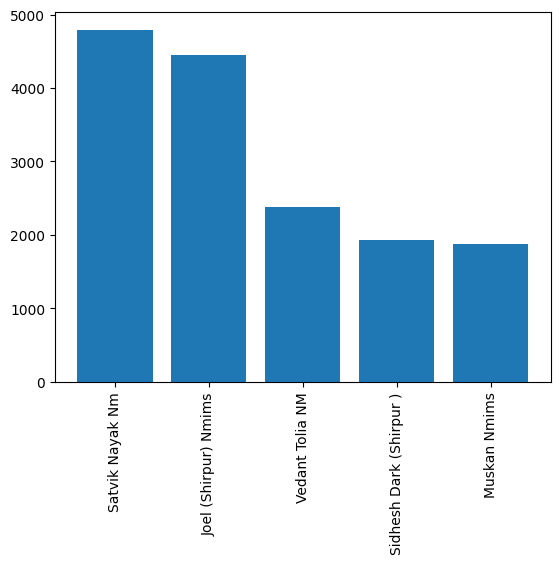

In [27]:
name = x.index
count = x.values
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [28]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'user':'name','count':'percent'})

name  percent
0           Satvik Nayak Nm    11.98
1      Joel (Shirpur) Nmims    11.13
2           Vedant Tolia NM     5.96
3   Sidhesh Dark (Shirpur )     4.83
4              Muskan Nmims     4.68
..                      ...      ...
65          +91 84839 20539     0.07
66          +91 98281 38737     0.03
67          +91 96310 57979     0.02
68          +91 94605 63890     0.01
69         +91 6378 718 863     0.00

[70 rows x 2 columns]

In [29]:
temp = df[df['user'] !='group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [30]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()


In [31]:
words = []

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [32]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

0      1
0     <media  14692
1   omitted>  14692
2      happy   1993
3   birthday   1857
4     double   1060
5    message    894
6    deleted    832
7      singh    740
8      https    623
9      class    570
10      join    506
11     patel    484
12      link    479
13         😂    465
14      joel    462
15     sahil    445
16    aditya    425
17  students    422
18     kumar    324
19        😂😂    303

In [33]:
# remove group messages
# remove media omitted message
# remove stop words

In [34]:
import emoji

emoji.EMOJI_DATA

{'🥇': {'en': ':1st_place_medal:',
  'status': 2,
  'E': 3,
  'de': ':goldmedaille:',
  'es': ':medalla_de_oro:',
  'fr': ':médaille_d’or:',
  'pt': ':medalha_de_ouro:',
  'it': ':medaglia_d’oro:'},
 '🥈': {'en': ':2nd_place_medal:',
  'status': 2,
  'E': 3,
  'de': ':silbermedaille:',
  'es': ':medalla_de_plata:',
  'fr': ':médaille_d’argent:',
  'pt': ':medalha_de_prata:',
  'it': ':medaglia_d’argento:'},
 '🥉': {'en': ':3rd_place_medal:',
  'status': 2,
  'E': 3,
  'de': ':bronzemedaille:',
  'es': ':medalla_de_bronce:',
  'fr': ':médaille_de_bronze:',
  'pt': ':medalha_de_bronze:',
  'it': ':medaglia_di_bronzo:'},
 '🆎': {'en': ':AB_button_(blood_type):',
  'status': 2,
  'E': 0.6,
  'alias': [':ab:'],
  'de': ':großbuchstaben_ab_in_rotem_quadrat:',
  'es': ':grupo_sanguíneo_ab:',
  'fr': ':groupe_sanguin_ab:',
  'pt': ':botão_ab_(tipo_sanguíneo):',
  'it': ':gruppo_sanguigno_ab:'},
 '🏧': {'en': ':ATM_sign:',
  'status': 2,
  'E': 0.6,
  'alias': [':atm:'],
  'de': ':symbol_geldautomat

In [35]:
emojis=[]
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

In [36]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

0     1
0    😂  2768
1    🥳   906
2    🎉   794
3    🔥   547
4    ✨   418
..  ..   ...
412  🕗     1
413  🖖     1
414  🌞     1
415  🍇     1
416  😚     1

[417 rows x 2 columns]

In [37]:
df['month_num'] = df['date'].dt.month

In [38]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [39]:
timeline

year  month_num      month  message
0   2020         10    October     2269
1   2020         11   November     1546
2   2020         12   December     1768
3   2021          1    January      437
4   2021          2   February     1245
5   2021          3      March     1663
6   2021          4      April     1198
7   2021          5        May     1682
8   2021          6       June      186
9   2021          7       July     1366
10  2021          8     August     2475
11  2021          9  September    13079
12  2021         10    October     1065
13  2021         11   November      873
14  2021         12   December      754
15  2022          1    January      666
16  2022          2   February      618
17  2022          3      March      821
18  2022          4      April      629
19  2022          5        May      425
20  2022          6       June      165
21  2022          7       July      638
22  2022          8     August      569
23  2022          9  September      687
24  2022         10    October      438
25  2022         11   November      291
26  2022         12   December      284
27  2023          1    January      446
28  2023          2   February      332
29  2023          3      March      950
30  2023          4      April      305
31  2023          5        May      128

In [40]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [41]:
timeline['time'] = time

In [42]:
timeline

year  month_num      month  message            time
0   2020         10    October     2269    October-2020
1   2020         11   November     1546   November-2020
2   2020         12   December     1768   December-2020
3   2021          1    January      437    January-2021
4   2021          2   February     1245   February-2021
5   2021          3      March     1663      March-2021
6   2021          4      April     1198      April-2021
7   2021          5        May     1682        May-2021
8   2021          6       June      186       June-2021
9   2021          7       July     1366       July-2021
10  2021          8     August     2475     August-2021
11  2021          9  September    13079  September-2021
12  2021         10    October     1065    October-2021
13  2021         11   November      873   November-2021
14  2021         12   December      754   December-2021
15  2022          1    January      666    January-2022
16  2022          2   February      618   February-2022
17  2022          3      March      821      March-2022
18  2022          4      April      629      April-2022
19  2022          5        May      425        May-2022
20  2022          6       June      165       June-2022
21  2022          7       July      638       July-2022
22  2022          8     August      569     August-2022
23  2022          9  September      687  September-2022
24  2022         10    October      438    October-2022
25  2022         11   November      291   November-2022
26  2022         12   December      284   December-2022
27  2023          1    January      446    January-2023
28  2023          2   February      332   February-2023
29  2023          3      March      950      March-2023
30  2023          4      April      305      April-2023
31  2023          5        May      128        May-2023

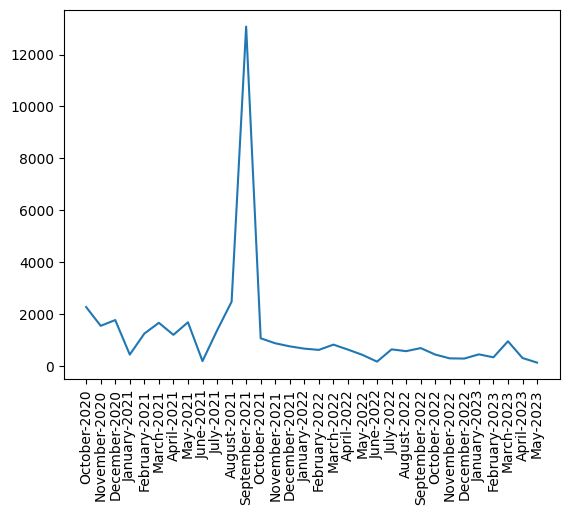

In [43]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation = 'vertical')
plt.show()

In [44]:
df['only_date']=df['date'].dt.date

In [45]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

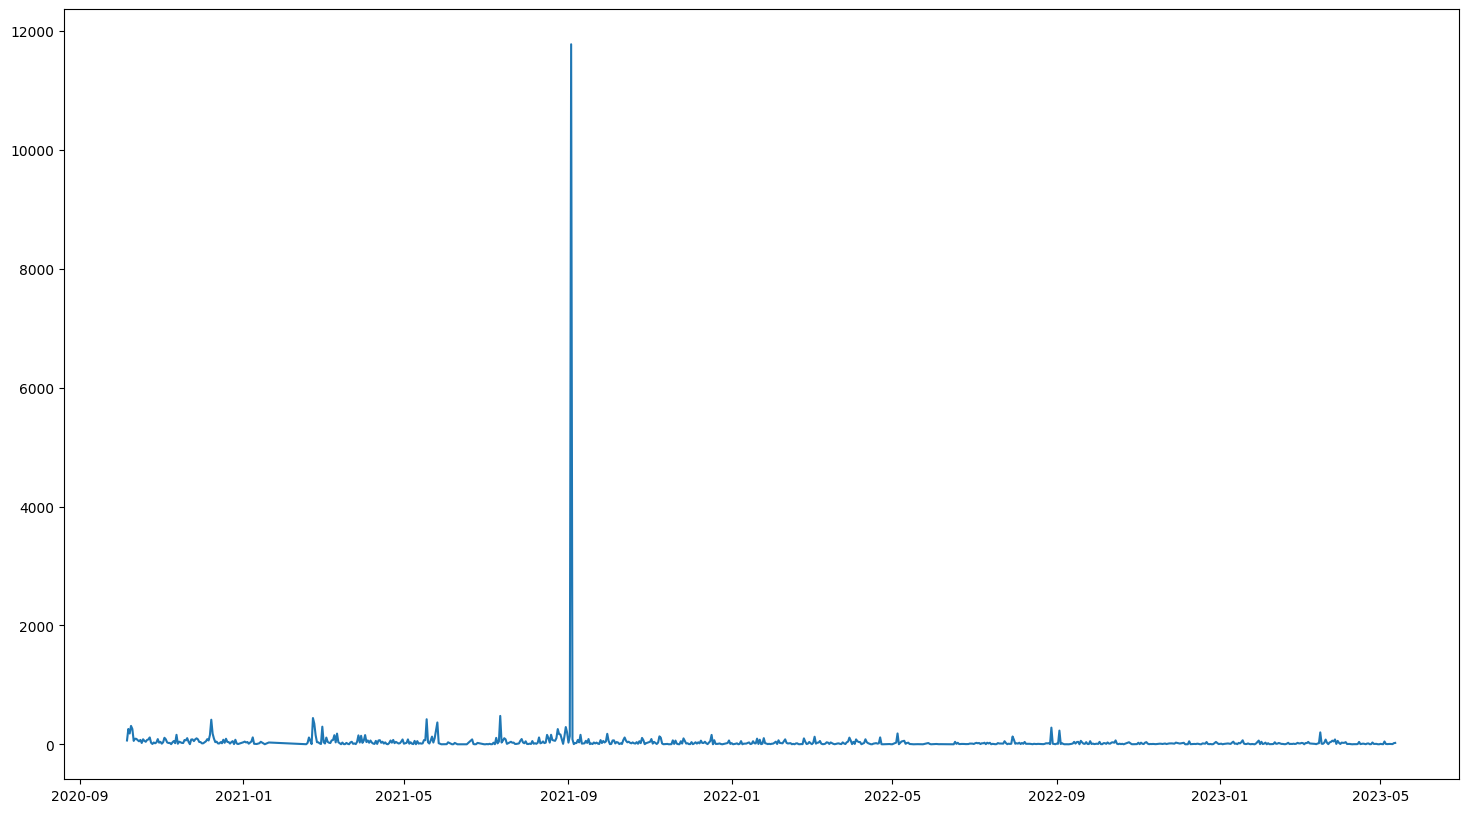

In [46]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [50]:
df['day_name']=df['date'].dt.day_name()

In [51]:
df['day_name'].value_counts()

day_name
Friday       16065
Tuesday       5143
Monday        4697
Thursday      4506
Wednesday     3840
Saturday      3258
Sunday        2489
Name: count, dtype: int64

In [54]:
period = []
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [55]:
df['period'] = period

In [56]:
df.sample(5)

date                     user              message  year   
128   2020-10-07 16:53:00  Sidhesh Dark (Shirpur )      Link mangwalo\n  2020  \
16727 2021-09-03 15:42:00          Vedant Tolia NM    <Media omitted>\n  2021   
23642 2021-09-03 16:03:00             Hardik Nmims    <Media omitted>\n  2021   
4494  2020-12-08 15:51:00          Satvik Nayak Nm   Simposter proven\n  2020   
12518 2021-07-12 12:56:00        Aryan Bawaskar Nm      Sahi baat hau\n  2021   

           month  day  hour  minute  month_num   only_date   day_name period  
128      October    7    16      53         10  2020-10-07  Wednesday  16-17  
16727  September    3    15      42          9  2021-09-03     Friday  15-16  
23642  September    3    16       3          9  2021-09-03     Friday  16-17  
4494    December    8    15      51         12  2020-12-08    Tuesday  15-16  
12518       July   12    12      56          7  2021-07-12     Monday  12-13

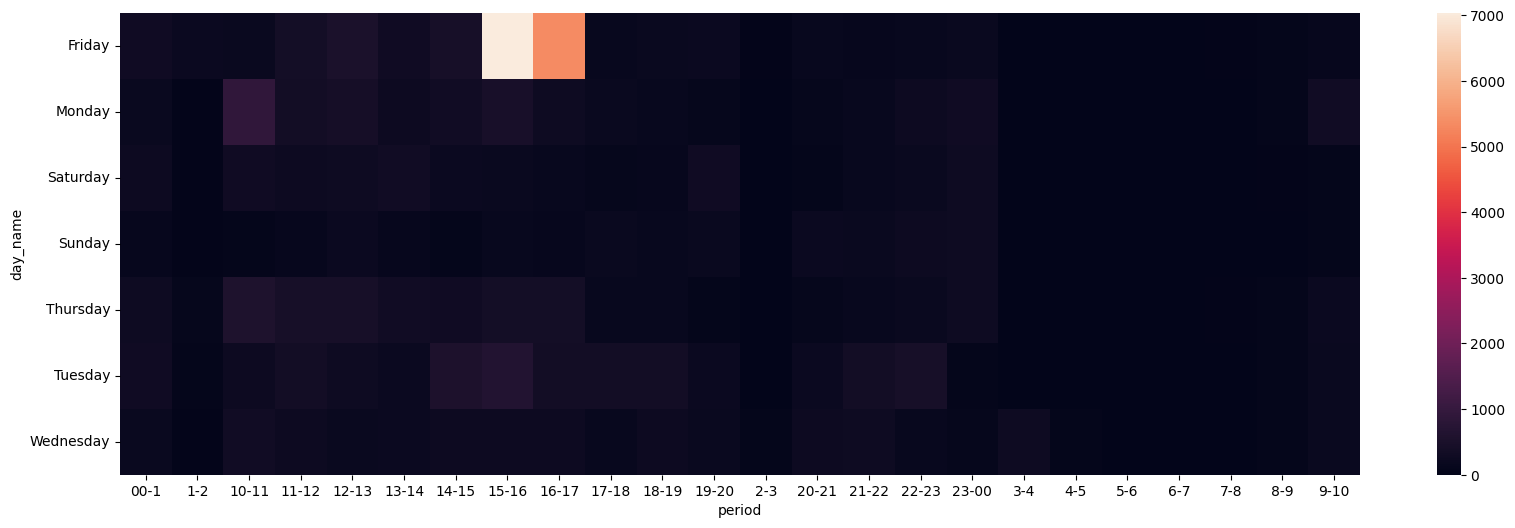

In [58]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()

In [59]:
df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0)

period      00-1    1-2  10-11  11-12  12-13  13-14  14-15   15-16   16-17   
day_name                                                                     
Friday     287.0  205.0  172.0  365.0  499.0  298.0  416.0  7038.0  5340.0  \
Monday     165.0   33.0  882.0  342.0  403.0  224.0  315.0   454.0   265.0   
Saturday   241.0   38.0  290.0  223.0  252.0  328.0  212.0   174.0   144.0   
Sunday     136.0   39.0   56.0  111.0  208.0  112.0   75.0   143.0   126.0   
Thursday   266.0   89.0  554.0  428.0  431.0  305.0  292.0   383.0   370.0   
Tuesday    298.0   71.0  242.0  344.0  250.0  193.0  545.0   634.0   353.0   
Wednesday  190.0   40.0  327.0  235.0  191.0  208.0  226.0   234.0   228.0   

period     17-18  ...  21-22  22-23  23-00    3-4   4-5  5-6   6-7   7-8   
day_name          ...                                                      
Friday     154.0  ...  122.0  143.0  179.0    5.0   9.0  5.0  10.0  34.0  \
Monday     181.0  ...  152.0  225.0  279.0   20.0   0.0  0.0  12.0  10.0   
Saturday   109.0  ...  140.0  189.0  271.0   12.0   6.0  0.0   0.0  13.0   
Sunday     179.0  ...  188.0  233.0  262.0    0.0   2.0  3.0   2.0   8.0   
Thursday   138.0  ...  140.0  168.0  267.0   22.0   4.0  0.0  10.0  34.0   
Tuesday    331.0  ...  334.0  438.0   75.0    4.0   3.0  3.0  20.0  13.0   
Wednesday  153.0  ...  254.0  140.0   99.0  268.0  71.0  2.0   2.0  12.0   

period      8-9   9-10  
day_name                
Friday     62.0  137.0  
Monday     67.0  310.0  
Saturday   35.0   81.0  
Sunday     22.0   58.0  
Thursday   57.0  202.0  
Tuesday    71.0  171.0  
Wednesday  66.0  182.0  

[7 rows x 24 columns]